# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from sklearn.decomposition import PCA
import joblib
import pickle
from flask import Flask, request, jsonify

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5'
df = pd.read_csv(url)
```





Kode ini menggunakan metode .head() dari objek DataFrame df untuk menampilkan lima baris pertama dari dataset. Ini berguna untuk mendapatkan gambaran awal tentang data dan struktur kolomnya. Bisa kita lihat jika kode dijalankan maka kolom seperti TransactionID hingga PrevieusTransactionDate beserta baris datanya.

In [35]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


Metode .info() memberikan ringkasan komprehensif tentang DataFrame. Ini mencakup jumlah total entri (baris), jumlah kolom, nama kolom, jumlah nilai non-null (tidak kosong) di setiap kolom, dan tipe data (dtype) dari setiap kolom.

<class 'pandas.core.frame.DataFrame'> -> objek yang dianalisis adalah DataFrame Pandas.

RangeIndex: 2537 entries, 0 to 2536 -> total baris ada 2536

Data columns (total 16 columns) -> total kolom 16

In [36]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("Informasi dataset (jumlah baris, kolom, tipe data):")
df.info()

Informasi dataset (jumlah baris, kolom, tipe data):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2

Metode .describe() menghasilkan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame. Ini memberikan gambaran tentang distribusi data.

*   count: Jumlah nilai non-null.
*   mean: Rata-rata.List item
*   std: Deviasi standar (ukuran sebaran data).
*   min: Nilai minimum.
*   25% (Q1): Kuartil pertama (25% data berada di bawah nilai ini).
*   50% (Median/Q2): Median (50% data berada di bawah nilai ini).
*   75% (Q3): Kuartil ketiga (75% data berada di bawah nilai ini).
*   max: Nilai maksimum.

In [37]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("Statistik deskriptif dataset:")
print(df.describe())

Statistik deskriptif dataset:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

fungs df.corr(numeric_only=True) akan menghitung matriks korelasi Pearson antara semua pasangan kolom numerik dalam DataFrame df. Argumen numeric_only=True memastikan hanya kolom numerik yang dipertimbangkan.

In [38]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Hitung matriks korelasi untuk semua kolom numerik
correlation_matrix = df.corr(numeric_only=True)

print("Matriks Korelasi Antar Fitur Numerik:")
print(correlation_matrix)

Matriks Korelasi Antar Fitur Numerik:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.024428             0.004782   
CustomerAge                  -0.024428     1.000000            -0.009852   
TransactionDuration           0.004782    -0.009852             1.000000   
LoginAttempts                -0.007397     0.007876             0.030076   
AccountBalance               -0.026310     0.321161             0.006859   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.007397       -0.026310  
CustomerAge               0.007876        0.321161  
TransactionDuration       0.030076        0.006859  
LoginAttempts             1.000000        0.009088  
AccountBalance            0.009088        1.000000  


Kode ini dijalankan untuk melihat serangkaian plot histogram, satu untuk setiap kolom numerik di dataset. Setiap histogram akan menampilkan distribusi frekuensi dari nilai-nilai di kolom tersebut. Dari sini, kita bisa mengamati apakah data terdistribusi secara normal, miring, atau memiliki karakteristik distribusi lainnya. Ini penting untuk memahami properti data sebelum memilih metode pra-pemrosesan atau model clustering.

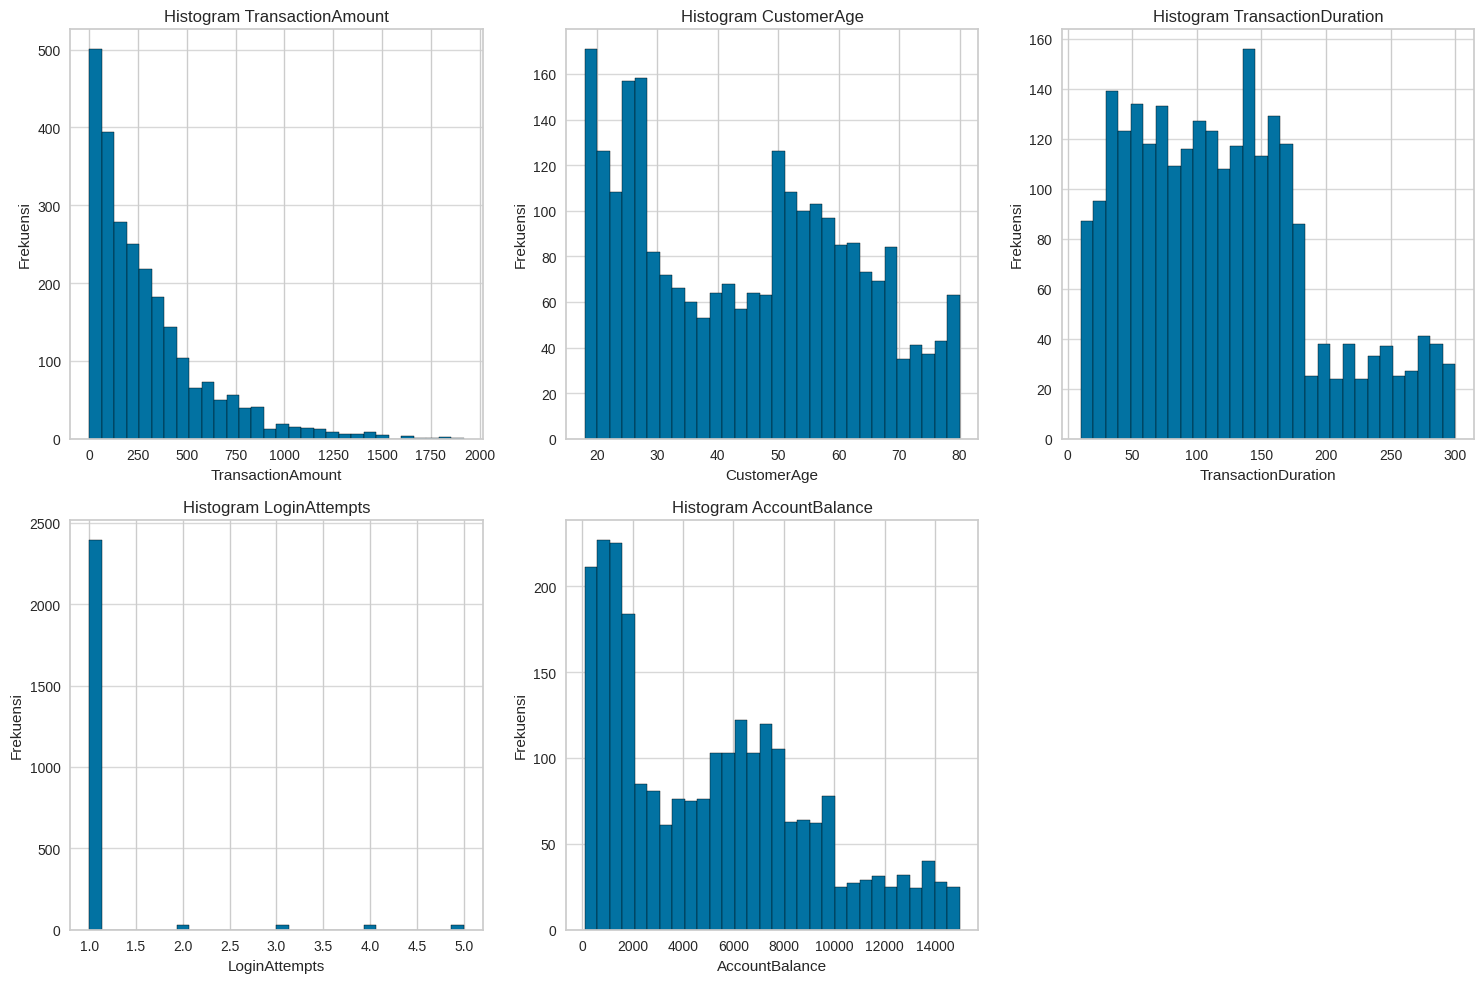

In [39]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Pilh kolomnumerik saja
numeric_cols = df.select_dtypes(include=['number']).columns

# Ukuran figure untuk histogramnya
plt.figure(figsize=(15, 10))

# Loop melalui setiap kolom numerik dan buat histogramnya
for i, col in enumerate(numeric_cols):
  plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
  df[col].hist(bins=30, edgecolor='black')
  plt.title(f'Histogram {col}')
  plt.xlabel(col)
  plt.ylabel('Frekuensi')
  plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [40]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


df.isnull() akan mengembalikan DataFrame boolean dengan ukuran yang sama dengan df, di mana True menunjukkan adanya nilai NaN (Not a Number) atau nilai hilang, dan False menunjukkan nilai yang ada.

Fungsi .sum() yang diterapkan setelah isnull() akan menghitung jumlah True untuk setiap kolom. Karena True secara default dianggap sebagai 1 dan False sebagai 0 dalam operasi numerik. Jadi dia menghitung totalnya.

In [41]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah nilai hilang per kolom\n")
print(df.isnull().sum())

Jumlah nilai hilang per kolom

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


df.duplicated() akan mengembalikan Series boolean. True menunjukkan bahwa baris tersebut adalah duplikat dari baris sebelumnya (termasuk semua kolom), dan False menunjukkan bahwa baris tersebut unik. Secara default, ia menandai semua duplikat kecuali kemunculan pertama.

Fungsi .sum() pada Series boolean ini akan menghitung total jumlah baris yang terdeteksi sebagai duplikat.

In [42]:
# Mengecek dataset menggunakan duplicated().sum()
print("Jumlah data duplikat\n")
print(df.duplicated().sum())

Jumlah data duplikat

21


**Metode yang digunakan:**
Feature Scaling / Standardisasi (Standardization).

**Alasan penggunaan:**
Sensitivitas Algoritma Clustering: Banyak algoritma clustering, terutama yang berbasis jarak seperti K-Means, sangat sensitif terhadap skala fitur. Fitur dengan nilai numerik yang lebih besar akan secara tidak proporsional mendominasi perhitungan jarak, padahal fitur dengan nilai kecil mungkin sama pentingnya.

Standardisasi: StandardScaler mengubah distribusi setiap fitur sehingga memiliki rata-rata (mean) nol dan standar deviasi (standard deviation) satu. Ini memastikan bahwa semua fitur memiliki skala yang seragam, sehingga tidak ada fitur yang mendominasi hanya karena rentang nilainya yang lebih besar.


**Hasil yang didapat:**

Kolom-kolom numerik dalam DataFrame df_scaled telah diubah skalanya. Nilai-nilai ini sekarang akan berada di sekitar nol, dengan sebagian besar data berada dalam rentang -3 hingga 3 (tergantung distribusinya).
Meskipun nilai-nilai berubah, bentuk distribusi asli dari setiap fitur numerik tetap dipertahankan.
Data kini siap untuk dimasukkan ke algoritma clustering, di mana perhitungan jarak akan menjadi lebih adil dan akurat, karena semua fitur akan memiliki kontribusi yang seimbang dalam menentukan kemiripan antar observasi.

In [43]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
# Identifikasi kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada kolom numerik
df_scaled = df.copy() # Buat salinan DataFrame
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("\nDataFrame setelah Feature Scaling:")
print(df_scaled.head())


DataFrame setelah Feature Scaling:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862     

Metode yang digunakan:

Penghapusan kolom (Feature Removal). Fungsi drop()

Alasan penggunaan:

Kolom ID (TransactionID, AccountID, MerchantID, DeviceID): Kolom-kolom ini merupakan pengidentifikasi unik untuk setiap transaksi atau entitas. Meskipun penting untuk identifikasi data, mereka tidak mengandung informasi deskriptif tentang karakteristik transaksi itu sendiri yang dapat digunakan oleh algoritma clustering untuk mengelompokkan data. Nilai-nilai unik ini akan menyebabkan setiap baris dianggap berbeda dan tidak akan membantu dalam menemukan pola atau kesamaan.


Kolom IP Address: Mirip dengan ID, alamat IP seringkali merupakan pengidentifikasi unik atau sangat bervariasi. Jika digunakan secara langsung, kolom ini cenderung akan membuat setiap transaksi terlihat unik dan tidak akan membantu dalam membentuk cluster yang bermakna. Jika ada niat untuk menggunakannya, IP Address biasanya memerlukan Feature Engineering yang kompleks (misalnya, ekstraksi geolokasi atau subnet) yang berada di luar lingkup langsung clustering dasar.

Kolom Tanggal (TransactionDate, PreviousTransactionDate): Meskipun tanggal dan waktu bisa menjadi sumber informasi yang kaya (misalnya, hari dalam seminggu, jam, musim), format mentahnya ('YYYY-MM-DD HH:MM:SS') tidak dapat langsung digunakan oleh algoritma clustering yang berbasis jarak. Jika ingin menggunakan informasi dari tanggal, perlu dilakukan feature engineering terlebih dahulu (misalnya, mengekstrak jam, hari, bulan, atau durasi antara transaksi), yang saat ini tidak menjadi fokus utama. Untuk clustering dasar, menghapus kolom tanggal mentah adalah praktik umum jika tidak ada fitur yang diekstrak.

Hasil yang didapat:
DataFrame df_processed kini hanya berisi kolom-kolom yang dianggap relevan dan bermakna untuk analisis clustering.
Ukuran DataFrame (jumlah kolom) telah berkurang, yang akan mengurangi kompleksitas komputasi dan potensi "kutukan dimensionalitas" (curse of dimensionality) untuk algoritma clustering.
Data kini lebih fokus pada atribut transaksi yang diharapkan dapat membantu algoritma clustering mengidentifikasi pola pengelompokan yang valid, seperti jumlah transaksi, durasi, usia pelanggan, dan sebagainya, tanpa gangguan dari pengidentifikasi unik atau data non-numerik yang belum diproses.

In [44]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = [
    'TransactionID',
    'AccountID',
    'MerchantID',
    'DeviceID',
    'IP Address',
    'TransactionDate', # Saya lihat di diskusi ada yangrekomendasi date juga dihapus
    'PreviousTransactionDate'
]

# Hapus kolom dari DataFram
df_processed = df_scaled.drop(columns=columns_to_drop, errors='ignore')

print("DataFrame setelah kolom yang ditentukan dihapus: ")
print(df_processed.head())

print("Informasi DataFrame setelah penghapusan kolom")
df_processed.info()

DataFrame setelah kolom yang ditentukan dihapus: 
   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0          -0.970546           Debit  San Diego     ATM     1.419862   
1           0.268963           Debit    Houston     ATM     1.307715   
2          -0.586526           Debit       Mesa  Online    -1.439874   
3          -0.387294           Debit    Raleigh  Online    -1.047361   
4          -0.972736          Credit    Atlanta  Online          NaN   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0             Doctor            -0.548393      -0.204629       -0.000315  
1             Doctor             0.307960      -0.204629        2.218381  
2            Student            -0.905207      -0.204629       -1.024091  
3            Student            -1.347656      -0.204629        0.886694  
4            Student             1.121495      -0.204629        0.594263  
Informasi DataFrame setelah penghapusan kolom
<class 'pandas.core.f

**Metode yang digunakan:**
Feature Encoding yaitu LabelEncoder

**Alasan penggunaan:**

Algoritma ML Membutuhkan Input Numerik: Sebagian besar algoritma Machine Learning, termasuk algoritma clustering seperti K-Means, tidak dapat bekerja secara langsung dengan data dalam format teks atau string (kategorikal). Mereka memerlukan input dalam bentuk numerik.

Mengubah Kategori Menjadi Angka: LabelEncoder mengonversi setiap nilai unik dalam sebuah kolom kategorikal menjadi representasi numerik. Misalnya, jika kolom TransactionType memiliki nilai 'Debit', 'Credit', 'Transfer', LabelEncoder mungkin mengubahnya menjadi 0, 1, 2 secara berurutan.

Sederhana dan Efisien: Untuk fitur kategorikal dengan jumlah kategori yang tidak terlalu banyak dan tidak memiliki urutan intrinsik yang signifikan, LabelEncoder adalah metode yang sederhana dan efisien.

**Hasil yang didapat:**

Kolom-kolom kategorikal dalam DataFrame df_encoded (misalnya TransactionType, Location, CustomerOccupation, Channel, dll. jika ada) akan diubah dari nilai teks menjadi nilai numerik integer.
Setiap kategori unik akan diwakili oleh sebuah angka unik.
DataFrame sekarang sepenuhnya terdiri dari tipe data numerik (integer dan float), membuatnya siap untuk diproses oleh algoritma Machine Learning (setelah penanganan nilai hilang yang akan Anda lakukan).

In [45]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Identifikasi kolom kategorikal
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

# Buat salinan DataFrame untuk menghindari SettingWithCopyWarning
df_encoded = df_processed.copy()

# Dictionary untuk menyimpan setiap LabelEncoder untuk setiap kolom
# Ini sangat PENTING untuk inverse_transform yang akurat di kemudian hari.
label_encoders = {}

# Loop tiap kolom kategorikal dan terapkan label encoding
for col in categorical_cols:
  try:
    # Inisialisasi LabelEncoder BARU untuk SETIAP KOLOM
    label_encoder = LabelEncoder()

    # Lakukan fit transform untuk kolom saat ini
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

    # Simpan objek encoder yang sudah dilatih ini ke dictionary
    label_encoders[col] = label_encoder

    # Simpan SETIAP objek LabelEncoder secara terpisah ke file
    joblib.dump(label_encoder, f'label_encoder_{col}.pkl')
    print(f"Kolom '{col}'berhasil di-encode dan encoder disimpan sebagai 'label_encoder_{col}.pkl ")

  except Exception as e:
    print(f"Error encoding column{col} : {e}")
    print(f"Unique values in {col} before encoding: {df_encoded[col].unique()}")

print("DataFrame setelah Feature Encoding: ")
print(df_encoded.head())

print("\nInformasi DataFrame setelah encoding")
df_encoded.info()


Kolom 'TransactionType'berhasil di-encode dan encoder disimpan sebagai 'label_encoder_TransactionType.pkl 
Kolom 'Location'berhasil di-encode dan encoder disimpan sebagai 'label_encoder_Location.pkl 
Kolom 'Channel'berhasil di-encode dan encoder disimpan sebagai 'label_encoder_Channel.pkl 
Kolom 'CustomerOccupation'berhasil di-encode dan encoder disimpan sebagai 'label_encoder_CustomerOccupation.pkl 
DataFrame setelah Feature Encoding: 
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2          NaN   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  
0                   0            -0.548393  

**Metode yang digunakan:**
Verifikasi Struktur Data. fungsi .columns dan .tolist() pada objek DataFrame df_encoded.

**Alasan penggunaan:**

Konfirmasi Pra-pemrosesan: Setelah serangkaian langkah pra-pemrosesan (scaling, penghapusan kolom, encoding), penting untuk melakukan pemeriksaan akhir untuk memastikan bahwa semua kolom yang tidak relevan telah dihapus dan semua kolom yang relevan (baik numerik asli maupun kategorikal yang sudah di-encode) masih ada dan siap untuk analisis lebih lanjut.

Persiapan Clustering: Daftar kolom ini akan menjadi fitur-fitur yang akan digunakan sebagai input untuk model clustering. Memastikan daftar ini akurat adalah krusial sebelum melangkah ke pembangunan model.

**Hasil yang didapat:**

Output akan berupa daftar (list) dari semua nama kolom yang saat ini ada di DataFrame df_encoded.
Daftar ini seharusnya hanya berisi kolom-kolom numerik yang sudah di-scaling (termasuk yang tadinya kategorikal dan sudah di-encode) dan tidak lagi menyertakan kolom-kolom ID, IP Address, atau tanggal mentah yang sudah dihapus.

In [46]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
print("Daftar seluruh kolom DataFrame setelah pra pemrosesan: ")
print(df_encoded.columns.tolist())

Daftar seluruh kolom DataFrame setelah pra pemrosesan: 
['TransactionAmount', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Metode yang digunakan: fillna()**

**Alasan penggunaan:**

Memilih imputasi dengan fillna() bertujuan untuk mempertahankan sebanyak mungkin baris data. Jika kita menggunakan dropna(), setiap baris yang memiliki setidaknya satu nilai hilang akan dihapus, yang berpotensi menyebabkan hilangnya sejumlah besar data yang sebenarnya masih memiliki informasi berharga di fitur lainnya. Dalam skenario clustering, mempertahankan ukuran dataset yang representatif sangatlah penting.

**Hasil yang didapat:**

Semua nilai hilang (NaN) di kolom-kolom numerik (seperti CustomerAge yang teridentifikasi sebelumnya) akan diganti dengan nilai median dari kolom tersebut.
df_cleaned.isnull().sum() akan menunjukkan bahwa tidak ada lagi nilai hilang di kolom yang telah ditangani.

In [47]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Identifikasi kolom dengan nilai hilang
missing_values_cols = df_encoded.isnull().sum()
missing_values_cols = missing_values_cols[missing_values_cols > 0 ].index.tolist()

print(f"Kolom dengan nilai hilang yang akan ditangani: {missing_values_cols}\n")

# Buat salinan DataFrame
df_cleaned = df_encoded.copy()

# Imputasi kolom numerik dengan nilai median
for col in missing_values_cols:
  if df_cleaned[col].dtype in ['int66', 'float64', 'int32', 'float32']:
    median_value = df_cleaned[col].median()
    df_cleaned[col] = df_cleaned[col].fillna(median_value)
    print(f"Nilai hilang pada kolom '{col}' diisi dengan medain {median_value}")
  else:
    print(f"Kolom '{col}' bukan numerik atau tidak ada imputasi khusus untuk tipe ini.")

print("Jumlah nilai hilang per kolom setelah imputasi: ")
print(df_cleaned.isnull().sum())

print("DataFrame setelah imputasi: ")
print(df_cleaned.head())

Kolom dengan nilai hilang yang akan ditangani: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

Nilai hilang pada kolom 'TransactionAmount' diisi dengan medain -0.29536169396032846
Nilai hilang pada kolom 'CustomerAge' diisi dengan medain 0.018030696996178132
Nilai hilang pada kolom 'TransactionDuration' diisi dengan medain -0.10594428030527052
Nilai hilang pada kolom 'LoginAttempts' diisi dengan medain -0.2046294076264745
Nilai hilang pada kolom 'AccountBalance' diisi dengan medain -0.09733351950520616
Jumlah nilai hilang per kolom setelah imputasi: 
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64
DataFrame setelah imputasi: 
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        

**Metode yang digunakan:**
drop_duplicates()

**Alasan penggunaan:**
Data duplikat dapat membiaskan analisis dan model Machine Learning. Jika ada baris yang sama persis muncul lebih dari satu kali, model dapat menganggap observasi tersebut lebih penting atau lebih sering terjadi dari yang sebenarnya, yang mengarah pada prediksi yang tidak akurat atau bias.

**Hasil yang didapat**
df_final_prep sekarang adalah DataFrame yang telah melalui semua tahap pra-pemrosesan: fitur numerik telah di-scaling, kolom-kolom yang tidak relevan telah dihapus, fitur kategorikal telah di-encode, nilai hilang telah diimputasi, dan sekarang baris-baris duplikat telah dihilangkan.

In [48]:
# Menghapus data duplikat menggunakan drop_duplicates().

# Cek kembali jummlah duplikatnya
print(f"Jumlah data duplikat sebelum pengahpusan: {df_cleaned.duplicated().sum()}")

# Hapus baris duplikat
# df_final_prep akan menjadi DataFrame yang sudah bersih dan siap untuk clustering
df_final_prep = df_cleaned.drop_duplicates()

print("\nJumlah baris duplikat setelah dihapus:", df_final_prep.duplicated().sum())
print(f"Jumlah baris setelah menghapus duplikat: {len(df_final_prep)}")
print(f"Jumlah baris sebelum menghapus duplikat: {len(df_cleaned)}")

Jumlah data duplikat sebelum pengahpusan: 24

Jumlah baris duplikat setelah dihapus: 0
Jumlah baris setelah menghapus duplikat: 2513
Jumlah baris sebelum menghapus duplikat: 2537


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [49]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [50]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

**Metode yang digunakan:**
describe()

**Alasan Pengunaan:**

Setelah berbagai transformasi (scaling, encoding, imputasi) dan penghapusan (kolom, duplikat), describe() memberikan ringkasan statistik (rata-rata, standar deviasi, min, max, kuartil) untuk semua kolom numerik.

**Hasil yang didapat:**

Output akan menampilkan tabel statistik deskriptif untuk setiap kolom numerik dalam df_final_prep. Nilai count, mean, std dsb akan muncul sehingga memberikan gamabran dari DataFrame yang sudah bersih.

In [51]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_final_prep.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,-0.002264,0.788301,21.276562,1.010744,-0.002676,1.529646,0.000904,0.000244,0.000207
std,0.996694,0.436846,12.394375,0.831005,0.994839,1.150333,0.994160,1.000771,0.995098
min,-1.017881,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100
25%,-0.734144,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.805299,-0.204629,-0.922216
50%,-0.295362,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-0.204629,-0.097334
75%,0.383177,1.000000,32.000000,2.000000,0.803056,3.000000,0.593411,-0.204629,0.648879
max,5.549651,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,6.525404,2.531190


**Metode yang digunakan:**
Elbow Method menggunakan fungsi KElbowVisualizer


**Alasan penggunaan:**
Algoritma K-Means memerlukan penentuan jumlah cluster (K) di awal. Pemilihan K yang tidak tepat dapat menghasilkan cluster yang tidak bermakna atau mengganggu hasil interpretasi. Elbow Method adalah heuristik populer yang membantu menemukan nilai K yang optimal.

**Hasil yang didapat:**
Sebuah plot visual yang menunjukan distortion score (sum of squared errors/SSE). Pada grafik terdapat sebuah titik yang merepresentasikan nilai K di mana penambahan cluster tidak lagi memberikan penurunan SSE yang signifikan, menandakan bahwa penambahan cluster setelah titik ini tidak lagi memberikan banyak informasi baru. Berdasarkan grafik yang diberikan dapat dilihat bahwa nilai K optimal adalah 4

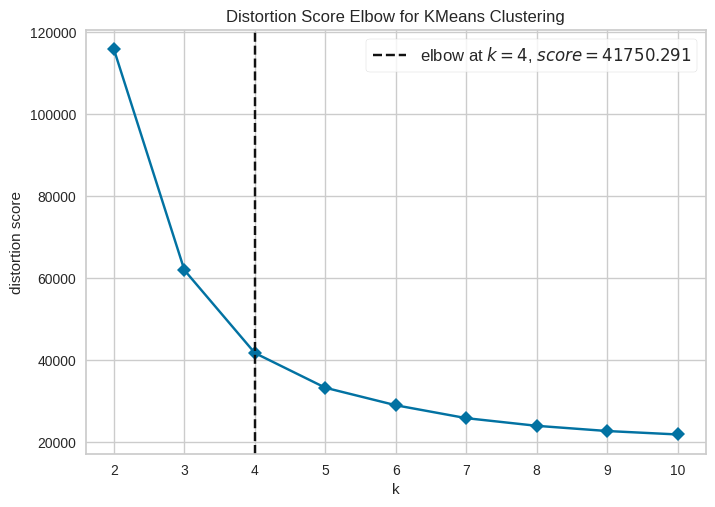

Nilai K terbaik yang disarankan oleh visualizer: 4


In [52]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans
model = KMeans(random_state=42, n_init=10)

# Inisialisasi KELbowVisualizer
# Menguji K dari 2 hingga 10 (rentang K yang umum, bisa disesuaikan)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False)

# Fit visualizer ke data
visualizer.fit(df_final_prep)

# Visualisasi Elbow Method
visualizer.show()

# Menampilkan nilai K terbaik yang disarankan oleh visualizer
best_k = visualizer.elbow_value_
print(f"Nilai K terbaik yang disarankan oleh visualizer: {best_k}")

**Metode yang digunakan:**
Unsupervised Learning (Clustering) fungsi K-Means Clustering.

**Alasan penggunaan:**

Pengelompokan Data Otomatis: K-Means adalah algoritma clustering yang populer dan efisien untuk mengelompokkan titik data ke dalam K cluster yang berbeda. Tujuannya adalah mempartisi data sehingga setiap titik data termasuk ke dalam cluster yang pusatnya (centroid) paling dekat.

Menciptakan Label untuk Fraud Detection: Dalam konteks proyek ini, tujuan utama adalah menggunakan clustering untuk menghasilkan "label" atau "kelas" pada dataset yang awalnya tidak berlabel. Cluster-cluster yang terbentuk diharapkan dapat merepresentasikan jenis-jenis perilaku transaksi yang berbeda, di mana salah satu atau beberapa cluster mungkin mengindikasikan pola yang mencurigakan atau berpotensi fraud.

**Hasil yang didapat:**

Model kmeans_model telah berhasil dilatih pada df_final_prep.
Setiap baris data dalam DataFrame df_clustered sekarang memiliki kolom baru bernama 'Cluster_Label', yang berisi nilai integer (0, 1, 2, 3) yang menunjukkan cluster tempat transaksi tersebut dikelompokkan.

In [53]:
# Menggunakan algoritma K-Means Clustering

# Nilai K terbaik dari cell sebelumnya
optimal_k = 4

# Inisialisasi model K-Means dengan K yang sudah ditentukan
# random_state=42 untuk reproduktifitas hasil
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

print(f"Melatih model K-Means dengan K = {optimal_k}")

# Melatih model K-Means pada datasetyang sudah diproses
kmeans_model.fit(df_final_prep)

# Mendapatkan label cluster untuk setiap baris data
# Label ini menunjukkan cluster mana setiap transaksi termasuk
cluster_labels = kmeans_model.labels_

# Menambahkan kolom label cluster ke DataFrame asli
# Ini penting untuk interpretasi dan penggunaan selanjutnya di supervised learning
df_clustered = df_final_prep.copy()
df_clustered['Cluster_Label'] = cluster_labels

print("\nDataFrame setelah ditambahkan kolom label cluster: ")
print(df_clustered.head())

print("\nJumlah anggota di setiap cluster:")
print(df_clustered['Cluster_Label'].value_counts().sort_index())

Melatih model K-Means dengan K = 4

DataFrame setelah ditambahkan kolom label cluster: 
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.594263   

   Cluster

Jalankan cell code ini untuk menyimpan model kamu.

**Metode yang digunakan:**
joblib (fungsi dump).

**Alasan penggunaan:**

Persistensi Model: Setelah model dilatih dan kinerja dianggap memuaskan, penting untuk "menyimpan" model tersebut ke dalam sebuah file. Ini disebut serialisasi atau persistensi model. Tanpa ini, model akan hilang dari memori setelah sesi Python berakhir, dan Anda harus melatihnya kembali dari awal setiap kali ingin menggunakannya.

**Hasil yang didapat:**
Sebuah file bernama model_clustering.h5

In [54]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans_model,"model_clustering.h5" )
print("\nModel K-Means clustering telah disimpan sebagai 'model_clustering.h5'.")


Model K-Means clustering telah disimpan sebagai 'model_clustering.h5'.


(Opsional) Membangun Model Clustering [Skilled]

**Metode yang digunakan:**
Fungsi: silhouette_score

**Alasan penggunaan:**
Mengukur Kualitas Cluster: Silhouette Score adalah metrik evaluasi yang digunakan untuk mengukur seberapa baik titik data cocok dalam cluster mereka sendiri dibandingkan dengan cluster tetangga. Skor ini berkisar dari -1 hingga 1.

**Hasil yang didapat:**
Nilai Silhouette Score sebesar 0.443 (atau sekitar 0.44) mengindikasikan kualitas clustering yang cukup baik hingga baik.

Nilai 0.443 berarti:

Positif: Cluster-cluster yang terbentuk cukup terpisah satu sama lain.

Jauh dari 0: Mengindikasikan bahwa tidak banyak tumpang tindih yang signifikan antar cluster.

Tidak Mendekati 1: Menunjukkan bahwa meskipun cluster terpisah dengan baik, mungkin ada beberapa titik data yang berada di "perbatasan" cluster atau kepadatan internal cluster mungkin tidak sempurna.



In [55]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_final_prep, cluster_labels)
print(f"Nilai Silhouette Score: {silhouette_avg:}")

Nilai Silhouette Score: 0.4431423433665664


**Metode yang digunakan:**
scatterplot

**Alasan penggunaan:**

Inspeksi Visual Langsung: Meskipun tidak merepresentasikan seluruh dimensi, visualisasi ini memungkinkan Anda melihat secara langsung bagaimana cluster-cluster terpisah (atau tumpang tindih) berdasarkan dua fitur yang dipilih. Ini dapat memberikan wawasan intuitif tentang karakteristik cluster dalam konteung fitur-fitur tersebut.

**Hasil yang didapat:**

Sumbu X akan merepresentasikan nilai TransactionAmount (setelah scaling) dan sumbu Y akan merepresentasikan nilai CustomerAge (setelah scaling dan imputasi).
Titik-titik ini akan diwarnai berdasarkan Cluster_Label yang telah ditetapkan oleh model K-Means. Anda akan melihat kelompok-kelompok titik dengan warna yang sama.

Membuat visualisasi cluster menggunakan 'TransactionAmount' dan 'CustomerAge'


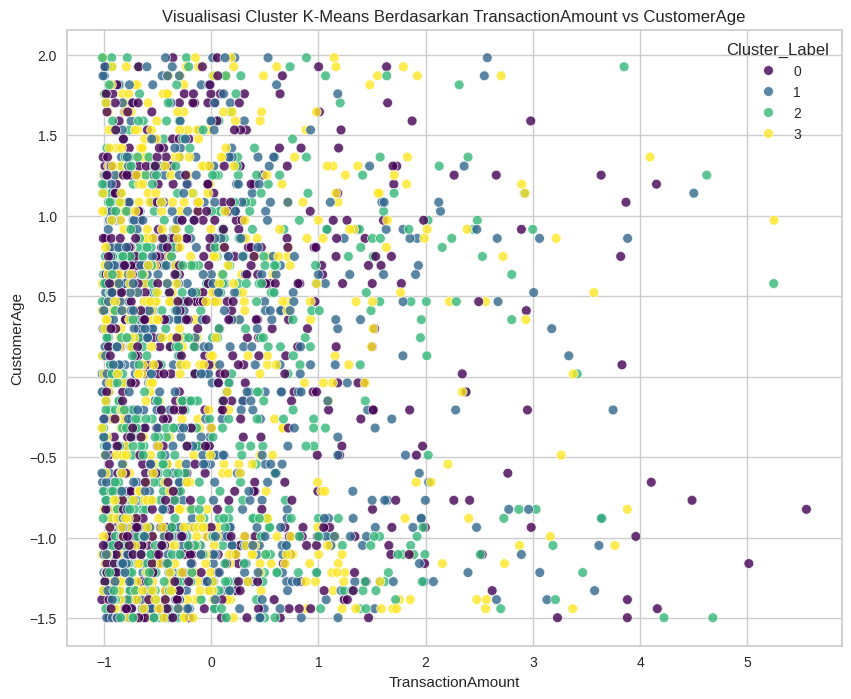

In [56]:
# Membuat visualisasi hasil clustering

# Kedua fitur bisa disesuaikan dengan keinginan asal ada di df_culstered dan dalam bentuk numerik
feature_x = "TransactionAmount"
feature_y = "CustomerAge"

print(f"Membuat visualisasi cluster menggunakan '{feature_x}' dan '{feature_y}'")

# Visualisasi menggunakan scatter plot dengan seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x=feature_x, y=feature_y, hue='Cluster_Label', data=df_clustered, palette='viridis', s=50, alpha=0.8, legend='full')
plt.title(f'Visualisasi Cluster K-Means Berdasarkan {feature_x} vs {feature_y}')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.grid(True)
plt.show()



(Opsional) Membangun Model Clustering [Advanced]

**Metode yang digunakan:**
Principal Component Analysis (PCA), scatterplot untuk visualisasi.


**Alasan penggunaan:**

Mengatasi Dimensi Tinggi: Dataset transaksi bank Anda memiliki banyak fitur (dimensi). Visualisasi langsung dari data multidimensional seperti itu di plot 2D atau 3D sangat sulit atau tidak mungkin dilakukan, yang mengakibatkan overplotting dan kurangnya kejelasan seperti yang Anda alami sebelumnya.

**Hasil yang didapatkan:**
Sebuah plot scatter 2D akan ditampilkan. Setiap titik pada plot mewakili satu transaksi dari dataset Anda, namun posisinya ditentukan oleh dua komponen utama yang diekstraksi oleh PCA.
Titik-titik ini akan diwarnai berdasarkan Cluster_Label yang telah ditetapkan oleh model K-Means.

Dari gambar tersebut, kita bisa melihat bahwa PCA telah mencoba untuk memisahkan empat cluster Anda berdasarkan dua komponen utama yang paling bervariasi. Terdapat beberapa area di mana cluster tampak cukup terpisah (misalnya, cluster 0 di bagian kiri bawah dan cluster 3 di kanan atas), namun ada juga area di mana cluster-cluster (seperti cluster 1 dan 2) tampak sedikit tumpang tindih atau bercampur di bagian tengah grafik. Ini menunjukkan bahwa meskipun ada struktur pengelompokan dalam data, mungkin ada beberapa ambiguitas di batas-batas cluster tertentu ketika dilihat hanya melalui dua dimensi utama.

Melakukan reduksi dimensi denagn PCA dan memvisualisasikan cluster


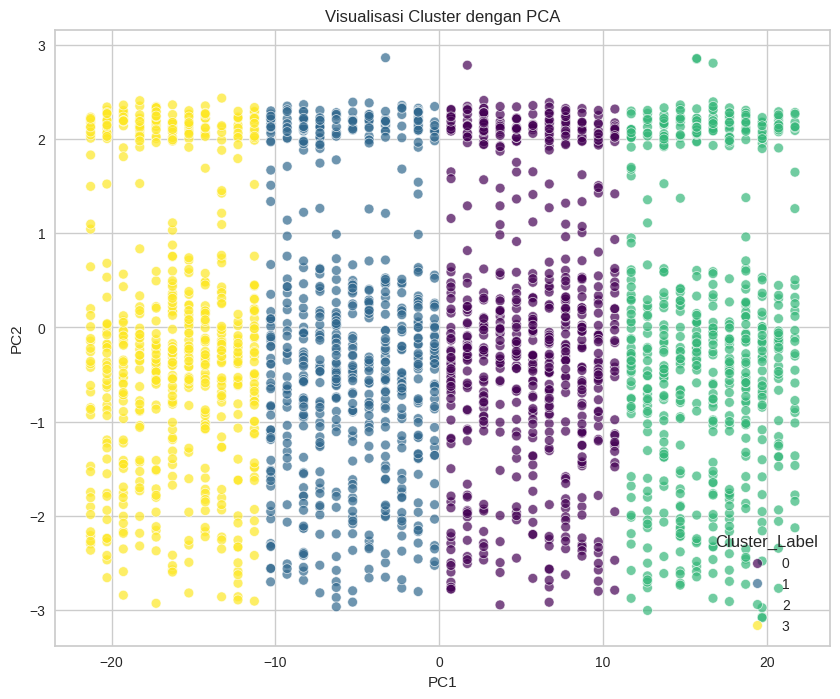

In [57]:
# Membangun model menggunakan PCA.


'''
Pisahkan fitur (X) dari label cluster (y) untuk PCA
Kita ingin melakukan PCA pada fitur-fitur, bukan pada label itu sendiri.
Label akan kita gunakan nanti untuk pewarnaan plot.
Pastikan untuk mengecualikan 'Cluster_Label' dari data input PCA
'''
x_for_pca = df_clustered.drop(columns=['Cluster_Label'])

# Inisialisasi PCA untuk mengurangi dimensi menjadi 2 komponen
pca = PCA(n_components=2) #n_components=2 berarti kita ingin memproyeksikan data ke dalam ruang 2 dimensi

print("Melakukan reduksi dimensi denagn PCA dan memvisualisasikan cluster")

# Lakukan transformasi PCA pada data
components = pca.fit_transform(x_for_pca) # .fit_transform() akan menghitung komponen utama dan mengubah data
'''
Buat DataFrame baru dari hasil PCA untuk memudahkan plotting
Kolom diberi nama 'PC1' dan 'PC2' untuk Principal Component 1 dan Principal Component 2
'''
pca_df = pd.DataFrame(data=components, columns=['PC1','PC2'])

'''
Tambahkan kembali kolom 'Cluster_Label' dari df_clustered ke DataFrame PCA
Ini penting agar kita bisa mewarnai titik-titik di plot berdasarkan cluster mereka
'''
pca_df['Cluster_Label'] = df_clustered['Cluster_Label'].values

# Visualisasi
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_Label', data=pca_df, palette='viridis', s=50, alpha=0.7, legend='full')
plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()



**Metode yang digunakan:**
joblib (fungsi dump).

**Alasan penggunaan:**

Konsistensi Transformasi: Saat Anda ingin menerapkan model clustering yang telah dilatih pada data baru, data baru tersebut harus melalui langkah pra-pemrosesan yang sama, termasuk transformasi PCA (jika Anda akan menggunakannya untuk visualisasi atau jika Anda membangun model klasifikasi berdasarkan komponen PCA). Dengan menyimpan objek pca yang sudah terlatih, Anda dapat memastikan bahwa transformasi yang diterapkan pada data baru konsisten dengan transformasi yang digunakan pada data pelatihan.

**Hasil yang didapat:**
Sebuah file bernama PCA_model_clustering.h5 akan dibuat di direktori kerja Anda.

In [58]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

joblib.dump(pca, "PCA_model_clustering.h5")
print("Model PCA telah disimpan sebagai 'PCA_model_clustering.h5'.")

Model PCA telah disimpan sebagai 'PCA_model_clustering.h5'.


# **5. Interpretasi Cluster**

**Metode yang digunakan:**
Menerapkan fungsi agregasi mean (rata-rata), min (nilai minimum), dan max (nilai maksimum) ke kolom-kolom yang ditentukan untuk setiap grup (klaster).

**Alasan penggunaan:**

Pemahaman Karakteristik Klaster Numerik (Data Belum Di-Inverse): Tujuan utama dari kode ini adalah untuk mendapatkan gambaran statistik dasar (rata-rata, minimum, dan maksimum) dari fitur-fitur numerik untuk setiap klaster.

**Hasil yang didapat:**

Output Konsol: Sebuah tabel ringkasan akan dicetak ke konsol. Tabel ini akan menampilkan Cluster_Label sebagai indeks, dan untuk setiap fitur numerik, akan ada tiga kolom sub-indeks: mean, min, dan max. Ini memberikan gambaran ringkas tentang distribusi nilai fitur numerik dalam setiap klaster pada skala terstandardisasi.

In [59]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

pd.set_option('display.max_columns', None)


print("Analisis deskriptif untuk tiap cluster: ")

numeric_features_for_interpretation = df_clustered.drop(columns=['Cluster_Label'])

# Agregasi tiap kolom
columns_to_aggregate = numeric_features_for_interpretation.columns.tolist()

# Menggunakan list kolom untuk fungsi agregasi
cluster_summary = df_clustered.groupby('Cluster_Label')[columns_to_aggregate].agg(['mean', 'min', 'max'])

print(cluster_summary)

Analisis deskriptif untuk tiap cluster: 
              TransactionAmount                     TransactionType          \
                           mean       min       max            mean min max   
Cluster_Label                                                                 
0                      0.012831 -1.017881  5.549651        0.780864   0   2   
1                     -0.001298 -1.017231  4.499790        0.793529   0   2   
2                      0.007874 -1.013945  5.244659        0.767169   0   2   
3                     -0.028858 -1.017676  5.248151        0.810985   0   2   

                Location           Channel         CustomerAge            \
                    mean min max      mean min max        mean       min   
Cluster_Label                                                              
0              26.870370  22  32  0.972222   0   3    0.015175 -1.495947   
1              15.970724  11  21  1.010786   0   3   -0.009358 -1.495947   
2              37.737018 

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
## **Interpretasi Hasil Clustering**


1.   Cluster 0: Nasabah Umum yang Konsisten dengan Durasi Transaksi Agak Panjang
  *   TransactionAmount (mean: 0.012831): Nilai rata-rata jumlah transaksi mereka sangat dekat dengan rata-rata keseluruhan dataset (karena 0 adalah rata-rata setelah scaling). Rentangnya cukup lebar, menunjukkan ada nasabah dengan transaksi kecil hingga sangat besar.
  *   CustomerAge (mean: 0.015175): Usia rata-rata nasabah di cluster ini juga sangat mendekati rata-rata usia keseluruhan.
  *   TransactionDuration (mean: 0.086474): Mereka cenderung memiliki durasi transaksi yang sedikit lebih panjang dibandingkan rata-rata.
  *   AccountBalance (mean: -0.031949): Saldo akun mereka cenderung sedikit di bawah rata-rata keseluruhan.
  *   LoginAttempts (mean: ~-0.01): Mirip dengan cluster lain, fitur ini tidak menunjukkan perbedaan signifikan.
  *   Kategorikal (TransactionType, Location, Channel, CustomerOccupation): Rata-rata nilai ter-encode dan rentang untuk fitur-fitur ini menunjukkan pola yang cukup konsisten dengan rata-rata, tanpa ada outlier yang jelas dalam skala ter-encode, kecuali mungkin ada variasi dalam mode lokasi yang ter-encode.

Gambaran Umum: Cluster ini mencakup sekelompok besar nasabah yang menunjukkan perilaku transaksi yang cukup mendekati rata-rata keseluruhan dataset, tanpa ekstrem yang menonjol pada sebagian besar fitur. Kelompok ini bisa jadi adalah "pelanggan dasar" Anda yang stabil. Saldo yang sedikit lebih rendah dan durasi transaksi yang lebih panjang bisa menjadi perhatian, mungkin menunjukkan interaksi yang lebih mendalam atau ada friksi.

2.   Cluster 1: Nasabah Muda dengan Saldo Agak Tinggi
  *   CustomerAge (mean: -0.069358): Rata-rata usia mereka sedikit di bawah rata-rata keseluruhan, mengindikasikan mereka adalah kelompok yang lebih muda.
  *   AccountBalance (mean: 0.025255): Saldo akun rata-rata mereka sedikit di atas rata-rata keseluruhan.
  *   Location (mean: 15.970724): Rata-rata nilai ter-encode untuk lokasi lebih rendah dibandingkan Cluster 0, 2, atau 3, menunjukkan kemungkinan mereka terkonsentrasi di lokasi tertentu yang berbeda dari kelompok lain.
  *   TransactionAmount (mean: -0.001298), TransactionDuration (mean: 0.046919), LoginAttempts (mean: ~-0.01): Fitur-fitur ini menunjukkan perilaku yang mendekati rata-rata keseluruhan.
  *   Kategorikal lainnya: Tampak tidak ada perbedaan signifikan dalam pola ter-encode pada TransactionType, Channel, dan CustomerOccupation dibandingkan dengan cluster lain.

Gambaran Umum: Cluster ini cenderung berisi nasabah yang lebih muda dengan saldo akun yang sedikit lebih tinggi dari rata-rata, namun perilaku transaksi lainnya cenderung standar.  Kelompok ini berpotensi untuk produk-produk yang menargetkan demografi muda dengan kapasitas finansial yang baik (saldo lebih tinggi).

3.   Cluster 2: Nasabah Muda yang Efisien dengan Lokasi Ter-encode Paling Tinggi
  *   CustomerAge (mean: -0.073077): Usia rata-rata mereka juga sedikit di bawah rata-rata, sangat mirip dengan Cluster 1.
  *   TransactionDuration (mean: -0.045388): Durasi transaksi mereka rata-rata lebih pendek dibandingkan cluster lain, menunjukkan efisiensi atau transaksi yang lebih cepat.
  *   Location (mean: 37.737018): Rata-rata nilai ter-encode untuk lokasi adalah yang tertinggi di antara semua cluster, menunjukkan bahwa mereka berasal dari satu atau beberapa lokasi spesifik yang memiliki nilai encoding tinggi.
  *   TransactionAmount (mean: 0.007874), LoginAttempts (mean: ~-0.01), AccountBalance (mean: 0.008742): Fitur-fitur ini menunjukkan perilaku yang mendekati rata-rata keseluruhan.
  *   Kategorikal lainnya: Tampak tidak ada perbedaan signifikan dalam pola ter-encode pada TransactionType, Channel, dan CustomerOccupation.

Gambaran Umum: Cluster ini menyerupai Cluster 1 dari segi usia, namun menonjol dengan durasi transaksi yang lebih pendek dan terkonsentrasi pada lokasi dengan nilai ter-encode tertinggi. Kelompok ini mungkin tertarik pada layanan yang mengutamakan kecepatan dan efisiensi. Lokasi spesifik mereka juga penting untuk strategi pemasaran yang ditargetkan.

4.   Cluster 3: Nasabah Lebih Tua dengan Lokasi Ter-encode Paling Rendah
  *   CustomerAge (mean: 0.053541): Rata-rata usia mereka sedikit di atas rata-rata keseluruhan, mengindikasikan mereka adalah kelompok yang lebih tua.
  *   Location (mean: 5.108239): Rata-rata nilai ter-encode untuk lokasi adalah yang paling rendah di antara semua cluster, menunjukkan mereka berasal dari satu atau beberapa lokasi spesifik yang memiliki nilai encoding rendah.
  *   TransactionAmount (mean: -0.028858), TransactionDuration (mean: -0.008527), LoginAttempts (mean: ~-0.01), AccountBalance (mean: -0.000625): Fitur-fitur ini menunjukkan perilaku yang sangat dekat dengan rata-rata keseluruhan, atau sedikit di bawah rata-rata untuk jumlah transaksi.
  *   Kategorikal lainnya: Tampak tidak ada perbedaan signifikan dalam pola ter-encode pada TransactionType, Channel, dan CustomerOccupation.
  
Gambaran Umum: Cluster ini dicirikan oleh nasabah yang sedikit lebih tua dari rata-rata dan terkonsentrasi pada lokasi dengan nilai ter-encode paling rendah. Kelompok ini mungkin memerlukan produk dan layanan yang sesuai dengan demografi usia yang lebih matang dan strategi pemasaran harus mempertimbangkan lokasi spesifik mereka.



# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.


---



**Metode yang digunakan:**
 Mengubah nama kolom dalam DataFrame

**Alasan penggunaan:**
Konsistensi Format Ekspor: Memindahkan kolom Target ke posisi paling akhir adalah preferensi umum dalam banyak set data, terutama ketika data akan diekspor dan digunakan oleh pihak lain atau model lain, karena kolom target sering diharapkan berada di akhir. Ini juga membantu dalam membaca CSV secara visual

**Hasil yang didapat:**

DataFrame Temporer: Sebuah DataFrame baru bernama df_export_encoded akan dibuat. DataFrame ini merupakan salinan dari df_clustered, tetapi dengan kolom Cluster_Label yang sudah diubah namanya menjadi Target, dan kolom Target ini akan diposisikan sebagai kolom terakhir dari DataFrame.

In [60]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Buat salinan DataFrame untuk ekspor agar tidak memodifikasi df_clustered asli
df_export_encoded = df_clustered.copy()

# Ganti nama kolom 'Cluster_Label' menjadi 'Target'
df_export_encoded = df_export_encoded.rename(columns={'Cluster_Label': 'Target'})

# Pindahkan kolom 'Target' ke posisi paling akhir
cols = df_export_encoded.columns.tolist() # Dapatkan semua nama kolom
if 'Target' in cols: # Pastikan kolom 'Target' ada
    cols.remove('Target') # Hapus 'Target' dari posisi saat ini
    cols.append('Target') # Tambahkan 'Target' ke posisi terakhir
    df_export_encoded = df_export_encoded[cols] # Terapkan urutan kolom yang baru

print("DataFrame setelah kolom 'Cluster_Label' diubah menjadi 'Target' dan dipindahkan ke akhir:")
print(df_export_encoded.head())

DataFrame setelah kolom 'Cluster_Label' diubah menjadi 'Target' dan dipindahkan ke akhir:
   TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0          -0.970546                1        36        0     1.419862   
1           0.268963                1        15        0     1.307715   
2          -0.586526                1        23        2    -1.439874   
3          -0.387294                1        33        2    -1.047361   
4          -0.972736                0         1        2     0.018031   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0            -0.548393      -0.204629       -0.000315   
1                   0             0.307960      -0.204629        2.218381   
2                   3            -0.905207      -0.204629       -1.024091   
3                   3            -1.347656      -0.204629        0.886694   
4                   3             1.121495      -0.204629        0.594263   

   Targe

**Metode yang digunakan:**

DataFrame.to_csv('filename.csv', index=False): Ini adalah metode Pandas yang digunakan untuk menulis DataFrame ke dalam format file CSV.

**Alasan penggunaan:**

Penyimpanan Hasil Analisis: Setelah melakukan proses clustering dan mendapatkan label untuk setiap baris data, penting untuk menyimpan hasil ini. File CSV adalah format yang universal dan mudah dibaca oleh berbagai aplikasi lain (seperti spreadsheet, database, atau alat visualisasi) untuk analisis atau penggunaan lebih lanjut.

**Hasil yang didapat:**

File CSV: Sebuah file CSV baru bernama data_clustering.csv akan dibuat di direktori kerja Anda. File ini akan berisi semua kolom dari df_export_encoded (yaitu, fitur-fitur yang belum di-inverse dan kolom Target yang berisi label cluster), tanpa kolom indeks.

In [61]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

output_filename_encoded = "data_clustering.csv" # Nama file yang lebih deskriptif
df_export_encoded.to_csv(output_filename_encoded, index=False)

print(f"Data clustering (belum di-inverse) berhasil diekspor ke '{output_filename_encoded}'")


Data clustering (belum di-inverse) berhasil diekspor ke 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**


---



**Metode yang digunakan:**

scaler.inverse_transform(data): Ini adalah metode kunci dari objek scaler (misalnya StandardScaler dari scikit-learn). Metode ini melakukan operasi kebalikan dari transformasi yang telah diterapkan sebelumnya. Jika data sebelumnya dinormalisasi (misalnya, menjadi rata-rata 0 dan standar deviasi 1), inverse_transform akan mengembalikannya ke skala asli mereka

**Alasan penggunaan:**

Interpretasi yang Lebih Mudah: Data numerik sering kali di-standardisasi (misalnya, menggunakan StandardScaler) selama pra-pemrosesan agar model clustering dapat bekerja lebih efektif karena semua fitur berada pada skala yang sebanding. Namun, nilai-nilai yang terstandardisasi (seperti -0.5, 1.2, dll.) sulit diinterpretasikan oleh manusia. Dengan melakukan inverse_transform, data numerik dikembalikan ke skala aslinya (misalnya, $1500, 30 tahun, dll.), membuat hasilnya jauh lebih mudah dipahami dan bermakna secara bisnis.

**Hasil yang didapat:**

DataFrame df_inverse_result: DataFrame ini akan berisi kolom-kolom numerik yang telah dikembalikan ke skala aslinya, sementara kolom kategorikal (jika ada) masih akan dalam bentuk ter-encode (karena inverse transform kategorikal dilakukan di langkah terpisah). Kolom Cluster_Label juga akan tetap ada.

In [62]:
# inverse dataset ke rentang normal untuk numerikal
# Ambil DataFrame untuk di-inverse
df_inverse_result = df_clustered.copy()

print("Memulai proses inverse transformation")

# Lakukan Inverse Transform pada Fitur Numerik (Standarisasi)
# Identifikasi kolom numerik yang ada di DataFrame dan yang seharusnya di-inverse
numeric_cols_in_df = [col for col in numeric_cols if col in df_inverse_result.columns]

if 'scaler' in locals() and numeric_cols_in_df:
    try:
        df_inverse_result[numeric_cols_in_df] = scaler.inverse_transform(df_inverse_result[numeric_cols_in_df])
        print(f"Inverse transform berhasil untuk kolom numerik: {numeric_cols_in_df}")
    except Exception as e:
        print(f"ERROR: Gagal inverse transform kolom numerik. Pastikan 'scaler' ada di memori dan kolom sesuai. Detail: {e}")
        # Jika gagal, kolom numerik akan tetap dalam skala terstandardisasi
else:
    print("WARNING: Objek 'scaler' tidak ditemukan di memori atau tidak ada kolom numerik yang sesuai untuk di-inverse.")
    print("Kolom numerik akan tetap dalam bentuk terstandardisasi.")

df_inverse_result.head()



Memulai proses inverse transformation
Inverse transform berhasil untuk kolom numerik: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster_Label
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,1
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,0
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,2
4,13.45,0,1,2,45.0,3,198.0,1.0,7429.40,3


**Metode yang digunakan:**
LabelEncoder.inverse_transform(data): Metode dari scikit-learn LabelEncoder ini berfungsi mengembalikan nilai-nilai numerik yang telah di-encode (misalnya, 0, 1, 2) kembali ke label kategorikal aslinya (misalnya, 'Engineer', 'Doctor', 'Student').

**Alasan penggunaan:**

Mengembalikan Data ke Format Asli untuk Interpretasi: Fitur kategorikal (seperti TransactionType, Location, Channel, CustomerOccupation) sering diubah menjadi representasi numerik (encoding) selama pra-pemrosesan agar dapat diproses oleh algoritma machine learning (seperti K-Means). Namun, angka-angka hasil encode ini tidak memiliki makna intuitif bagi manusia. Proses inverse_transform mengembalikan label-label ini ke bentuk teks aslinya (misalnya, dari 0 menjadi 'Debit', atau dari 1 menjadi 'ATM'), yang esensial untuk memahami karakteristik cluster secara bermakna dan relevan secara bisnis.

**Hasil yang didapat:**

DataFrame df_inverse_result yang Telah Terinversi Penuh: Setelah kode ini dijalankan, DataFrame df_inverse_result akan berisi semua fitur numerik dalam skala aslinya (dari langkah sebelumnya) dan semua fitur kategorikal dalam label teks aslinya. Kolom Cluster_Label juga tetap ada.

In [63]:
# inverse dataset yang sudah diencode ke kategori aslinya.


print("Memulai inverse transform untuk kolom kategorikal\n")

# --- Muat kembali setiap LabelEncoder yang telah disimpan ---
loaded_encoders = {}
# Ini adalah daftar kolom kategorikal yang *seharusnya* di-encode
# Anda bisa menggunakan 'categorical_cols' yang sudah terdefinisi dari tahap pra-pemrosesan.
# Jika tidak, definisikan ulang di sini.
# Contoh: categorical_cols_to_decode = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

for col_name in categorical_cols: # Loop melalui setiap nama kolom kategorikal
    try:
        # Muat LabelEncoder yang spesifik untuk kolom ini
        encoder_path = f"label_encoder_{col_name}.pkl"
        le = joblib.load(encoder_path)
        loaded_encoders[col_name] = le
        print(f"  LabelEncoder untuk '{col_name}' berhasil dimuat dari '{encoder_path}'.")
    except FileNotFoundError:
        print(f"  PERINGATAN: LabelEncoder untuk '{col_name}' tidak ditemukan di '{encoder_path}'. Kolom ini tidak akan di-inverse transform.")
        loaded_encoders[col_name] = None # Tandai bahwa encoder tidak ditemukan

# --- Lakukan Inverse Transform pada Kolom Kategorikal ---
for col in categorical_cols: # Loop lagi untuk melakukan inversi
    if col in df_inverse_result.columns and loaded_encoders.get(col) is not None:
        try:
            # Pastikan kolom adalah tipe integer sebelum inverse_transform
            # Ini penting karena inverse_transform mengharapkan input integer.
            df_inverse_result[col] = loaded_encoders[col].inverse_transform(df_inverse_result[col].astype(int))
            print(f"  Inverse transform berhasil untuk kolom kategorikal: '{col}'")
        except Exception as e:
            print(f"  ERROR: Gagal inverse transform kolom kategorikal '{col}'. Detail: {e}")
            print(f"  Kolom '{col}' akan tetap dalam bentuk ter-encode.")
    elif col in df_inverse_result.columns:
        print(f"  Kolom '{col}' ada di DataFrame tetapi tidak dapat di-inverse (encoder tidak dimuat).")
    else:
        print(f"  Kolom '{col}' tidak ditemukan di DataFrame untuk di-inverse.")


print("\nDataFrame setelah Inverse Transformation (Numerik & Kategorikal):")
df_inverse_result.head()

Memulai inverse transform untuk kolom kategorikal

  LabelEncoder untuk 'TransactionType' berhasil dimuat dari 'label_encoder_TransactionType.pkl'.
  LabelEncoder untuk 'Location' berhasil dimuat dari 'label_encoder_Location.pkl'.
  LabelEncoder untuk 'Channel' berhasil dimuat dari 'label_encoder_Channel.pkl'.
  LabelEncoder untuk 'CustomerOccupation' berhasil dimuat dari 'label_encoder_CustomerOccupation.pkl'.
  Inverse transform berhasil untuk kolom kategorikal: 'TransactionType'
  Inverse transform berhasil untuk kolom kategorikal: 'Location'
  Inverse transform berhasil untuk kolom kategorikal: 'Channel'
  Inverse transform berhasil untuk kolom kategorikal: 'CustomerOccupation'

DataFrame setelah Inverse Transformation (Numerik & Kategorikal):


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster_Label
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,1
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,0
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2
4,13.45,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,3


**Metode yang digunakan:**

Agregasi Data Numerik (.agg(['mean', 'min', 'max'])): Setelah data dikelompokkan, metode agg ini secara serentak menghitung rata-rata (mean), nilai minimum (min), dan nilai maksimum (max) untuk setiap fitur numerik di dalam masing-masing klaster.

Agregasi Data Kategorikal (.agg(lambda x: x.mode()[0])): Untuk fitur kategorikal, metode agg ini menggunakan fungsi lambda kustom untuk menemukan mode (nilai yang paling sering muncul) dari setiap fitur di dalam masing-masing klaster. Ini memberikan representasi kategorikal yang paling dominan per klaster.

**Alasan penggunaan:**

Interpretasi Komprehensif Data Asli: Ini adalah kode inti untuk melakukan interpretasi yang bermakna dari hasil clustering. Dengan mengembalikan data ke skala dan label aslinya melalui inverse_transform dan kemudian menghitung statistik deskriptif per cluster, Anda mendapatkan gambaran yang jelas dan intuitif tentang karakteristik masing-masing segmen pelanggan.

**Hasil yang didapat:**

Dua Tabel Ringkasan (Output Konsol):
1. Ringkasan Fitur Numerik (Skala Asli)": Sebuah tabel yang menunjukkan rata-rata, nilai minimum, dan nilai maksimum untuk setiap fitur numerik (TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, AccountBalance) untuk setiap Cluster_Label.
2. Ringkasan Fitur Kategorikal (Mode)": Serangkaian tabel yang terpisah (satu untuk setiap kolom kategorikal: TransactionType, Location, Channel, CustomerOccupation) yang menunjukkan nilai mode (label teks asli yang paling sering muncul) untuk setiap kategori di setiap Cluster_Label.

In [64]:
print("Analisis Deskriptif Tiap Cluster (Data Setelah Inverse Transform)")

# Pengaturan opsi tampilan Pandas agar semua kolom terlihat
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) # Tambahkan ini agar semua baris mode terlihat jika banyak

# Pisahkan kolom numerik dan kategorikal (setelah inverse transform)
numeric_features_after_inverse = df_inverse_result.select_dtypes(include=['number']).columns.tolist()
if 'Cluster_Label' in numeric_features_after_inverse:
    numeric_features_after_inverse.remove('Cluster_Label')

# Pastikan ini mengambil kolom objek (string) setelah inverse
categorical_features_after_inverse = df_inverse_result.select_dtypes(include=['object']).columns.tolist()

# Ringkasan untuk Fitur Numerik (Mean, Min, Max)
cluster_summary_num = df_inverse_result.groupby('Cluster_Label')[numeric_features_after_inverse].agg(['mean', 'min', 'max'])
print("\nRingkasan Fitur Numerik (Skala Asli):")
print(cluster_summary_num)

# Ringkasan untuk Fitur Kategorikal (Mode / Most Frequent)
print("\nRingkasan Fitur Kategorikal (Mode):")
for col in categorical_features_after_inverse:
    if col in df_inverse_result.columns: # Pastikan kolom ada
        # Menggunakan .mode()[0] untuk mengambil mode pertama jika ada beberapa mode
        # Menggunakan .fillna('N/A') jika ada cluster tanpa data untuk kolom tsb (jarang)
        mode_summary = df_inverse_result.groupby('Cluster_Label')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
        print(f"\nMode untuk kolom '{col}':")
        print(mode_summary)
    else:
        print(f"\nKolom '{col}' tidak ditemukan di DataFrame.")

# --- Mengembalikan opsi tampilan Pandas ke default ---
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_rows')

Analisis Deskriptif Tiap Cluster (Data Setelah Inverse Transform)

Ringkasan Fitur Numerik (Skala Asli):
              TransactionAmount                CustomerAge              \
                           mean   min      max        mean   min   max   
Cluster_Label                                                            
0                    301.405355  0.26  1919.11   44.949074  18.0  80.0   
1                    297.277196  0.45  1612.37   44.511556  18.0  80.0   
2                    299.957119  1.41  1830.00   43.375209  18.0  80.0   
3                    289.224927  0.32  1831.02   45.633279  18.0  80.0   

              TransactionDuration              LoginAttempts            \
                             mean   min    max          mean  min  max   
Cluster_Label                                                            
0                      119.876543  10.0  300.0      1.128086  1.0  5.0   
1                      122.710324  10.0  299.0      1.154083  1.0  5.0   
2     

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
**Interpretasi Detail Tiap Cluster (Data Setelah Inverse Transform)**

Cluster 0: "Pelanggan Aktif Rata-rata dari Oklahoma City (Mahasiswa/Karyawan)"
  *   TransactionAmount (Rata-rata: 381.48): Rata-rata transaksi mereka menunjukkan volume uang yang tinggi per transaksi.
  *   AccountBalance (Rata-rata: $4988.92): Saldo akun yang relatif lebih rendah mungkin mengindikasikan mereka cenderung langsung menggunakan dana untuk transaksi.
  *   TransactionType (Mode: Debit): Mayoritas transaksi adalah Debit, konsisten dengan pengeluaran aktif.
  *   Channel (Mode: ATM): Preferensi yang kuat terhadap ATM menunjukkan kemungkinan interaksi fisik atau preferensi untuk penarikan tunai/transaksi cepat.
  *   Location (Mode: Oklahoma City): Menunjukkan segmentasi geografis yang jelas.
  *   CustomerOccupation (Mode: Student): Profesi yang dominan ini sangat relevan, mengindikasikan mungkin mahasiswa yang mengelola keuangan sehari-hari.
  *   CustomerAge (Rata-rata: 44.94 tahun): Usia yang cukup dewasa untuk seorang "mahasiswa" bisa berarti mahasiswa pascasarjana, atau ini adalah kategori umum yang juga mencakup "karyawan".

Gambaran Umum: Cluster ini menonjol dengan rata-rata jumlah transaksi tertinggi di antara semua cluster (381.48), menunjukkan mereka adalah pengguna layanan yang sangat aktif. Meskipun demikian, saldo akun mereka cenderung paling rendah di antara kelompok ($4988.92). Sebagian besar transaksi mereka adalah Debit melalui ATM. Mereka dominan berlokasi di Oklahoma City dan sebagian besar berprofesi sebagai Mahasiswa (Student). Usia mereka rata-rata sekitar 45 tahun.

Rekomendasi Bisnis:
Produk/Layanan: Tawarkan paket transaksi bebas biaya ATM, cashback untuk transaksi Debit, atau diskon khusus untuk mahasiswa/karyawan. Pertimbangkan layanan mobile banking yang efisien untuk melengkapi penggunaan ATM.
Pemasaran: Targetkan kampanye pemasaran di area Oklahoma City dan di sekitar kampus atau area perumahan mahasiswa.
Edukasi Keuangan: Berikan edukasi tentang manajemen uang, pentingnya menabung, atau opsi investasi ringan untuk meningkatkan saldo akun mereka.


Cluster 1: Profesional dengan Saldo Tertinggi dari Fort Worth (Paling Loyal/Simpanan Besar)
*   CustomerAge (Rata-rata: 44.51 tahun): Usia rata-rata yang matang.
*   TransactionAmount (Rata-rata: 297.27): Jumlah transaksi mereka moderat, tidak setinggi Cluster 0.
*   Location (Mode: Fort Worth): Menunjukkan segmentasi geografis yang jelas, mungkin area dengan demografi profesional tinggi.
*   Channel (Mode: Branch): Preferensi kuat terhadap transaksi di cabang menunjukkan mereka mungkin menghargai interaksi personal, layanan yang lebih kompleks, atau konsultasi finansial.
*   CustomerOccupation (Mode: Doctor): Profesi ini seringkali diasosiasikan dengan pendapatan tinggi dan stabilitas finansial.
*   AccountBalance (Rata-rata: $5211.86): Saldo akun yang menonjol ini adalah indikator utama kekayaan atau kecenderungan menabung.

Gambaran Umum: Cluster ini menonjol dengan rata-rata jumlah transaksi tertinggi di antara semua cluster (381.48), menunjukkan mereka adalah pengguna layanan yang sangat aktif. Meskipun demikian, saldo akun mereka cenderung paling rendah di antara kelompok ($4988.92). Sebagian besar transaksi mereka adalah Debit melalui ATM. Mereka dominan berlokasi di Oklahoma City dan sebagian besar berprofesi sebagai Mahasiswa (Student). Usia mereka rata-rata sekitar 45 tahun.

Rekomendasi Bisnis:
Produk/Layanan: Tawarkan produk investasi premium (reksa dana, obligasi), layanan prioritas/wealth management, pinjaman dengan bunga kompetitif, atau produk asuransi kelas atas.
Pemasaran: Fokus pada penawaran yang dipersonalisasi melalui manajer hubungan pelanggan di cabang-cabang Fort Worth. Tekankan keamanan dan pertumbuhan investasi.
Loyalitas: Pertimbangkan program loyalitas eksklusif untuk nasabah dengan saldo tinggi.

Cluster 2: Profesional Transaksi Efisien dari Tucson (Mengutamakan Kecepatan Cabang)
*   AccountBalance (Rata-rata: $5147.50): Saldo akun tinggi.
*   CustomerAge (Rata-rata: 43.37 tahun): Usia rata-rata yang sedikit lebih muda.
*   Location (Mode: Tucson): Menunjukkan segmentasi geografis.
*   Channel (Mode: Branch): Meskipun ingin cepat, mereka masih memilih cabang, mungkin untuk layanan yang terpercaya dan terjamin.
*   CustomerOccupation (Mode: Doctor): Sama seperti Cluster 1, menunjukkan kapasitas finansial yang baik.
*   TransactionDuration (Rata-rata: 116.24 menit): Durasi transaksi yang paling singkat menunjukkan mereka menginginkan proses yang cepat dan tanpa hambatan.

Gambaran Umum: Cluster ini mirip dengan Cluster 1 dalam hal profesi utama (Dokter) dan penggunaan Cabang Bank (Branch) sebagai channel dominan. Namun, mereka memiliki durasi transaksi terpendek (116.24 menit) di antara semua cluster, menunjukkan preferensi untuk efisiensi. Mereka dominan berlokasi di Tucson. Usia mereka sedikit lebih muda dari rata-rata (43.37 tahun), dengan saldo akun (5147.50) dan jumlah transaksi $299.95 yang solid.

Rekomendasi Bisnis:
Produk/Layanan: Fokus pada optimalisasi layanan di cabang (misalnya, jalur cepat, janji temu online untuk konsultasi, dokumen pra-isi). Promosikan aplikasi mobile untuk tugas-tugas sederhana agar mengurangi waktu di cabang.
Pemasaran: Targetkan para profesional di Tucson dengan pesan efisiensi dan layanan premium yang cepat.
Pengembangan Produk: Pertimbangkan fitur digital yang mempercepat interaksi di cabang, seperti scan QR untuk antrean.

Cluster 3: Nasabah Moderat dari Charlotte (Mahasiswa/Karyawan Lebih Tua)
*   AccountBalance (Rata-rata: 5111.88): Saldo akun mereka masih cukup sehat, menunjukkan mereka memiliki dana meskipun transaksi rendah.
*   Location (Mode: Charlotte): Menunjukkan segmentasi geografis yang jelas.
*   Channel (Mode: Branch): Preferensi cabang, mungkin karena kenyamanan atau kebutuhan akan bantuan/konsultasi lebih.
*   CustomerAge (Rata-rata: 45.63 tahun): Kelompok usia paling matang, yang anehnya berprofesi sebagai "Student". Ini bisa jadi karena generalisasi dalam data okupasi atau mencakup mahasiswa paruh waktu yang lebih tua.
*   TransactionAmount (Rata-rata: $289.22): Rata-rata transaksi terendah, mengindikasikan mereka mungkin lebih selektif dalam pengeluaran.

Gambaran Umum: Cluster ini memiliki rata-rata jumlah transaksi terendah ($289.22), menunjukkan aktivitas transaksi yang lebih rendah atau lebih selektif. Mereka adalah kelompok dengan usia rata-rata tertua (45.63 tahun). Mirip dengan Cluster 0, mereka dominan berprofesi sebagai Mahasiswa (Student), dan berlokasi di Charlotte. Transaksi mereka sebagian besar Debit melalui Cabang Bank (Branch).

Rekomendasi Bisnis:
Produk/Layanan: Tawarkan produk tabungan dengan bunga menarik, perencanaan pensiun, atau investasi jangka panjang yang tidak memerlukan interaksi transaksi tinggi. Layanan konsultasi keuangan personal di cabang akan sangat dihargai.
Pemasaran: Targetkan demografi yang lebih tua di Charlotte. Promosikan stabilitas finansial dan layanan yang memberikan ketenangan pikiran.
Edukasi Keuangan: Berikan seminar atau materi tentang perencanaan keuangan untuk pensiun atau pengelolaan aset.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [65]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [66]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)